# Airline Passenger Satisfaction Classification Project ✈️

## Part 2: Classification Model Building and Evaluation 📈

**Objective:** To build and evaluate a classification model to predict passenger satisfaction.

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/cleaned_airline_passenger_satisfaction.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Avg_Service_Rating,Delay_Diff_in_mins
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,4.181818,-7.0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,2.181818,5.0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,4.181818,0.0
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,2.454545,-2.0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,3.636364,0.0


In [6]:
# Baseline Accuracy
df['satisfaction'].value_counts(normalize = True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

In [7]:
# Train-Test Split
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [9]:
# Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

## Model 1 - KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_train_sc, y_train)

0.9463735756082537

In [13]:
knn.score(X_test_sc,  y_test)

0.925277178934401

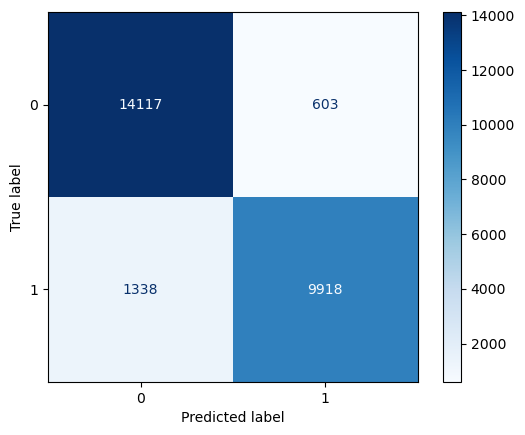

In [14]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues')

In [ ]:
# Model 2 – Logistic Regression
from sklearn.linear_model import LogisticRegression

In [22]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [24]:
logr.score(X_train_sc, y_train)

0.8745123703931834

In [26]:
logr.score(X_test_sc, y_test)

0.8762319063751155

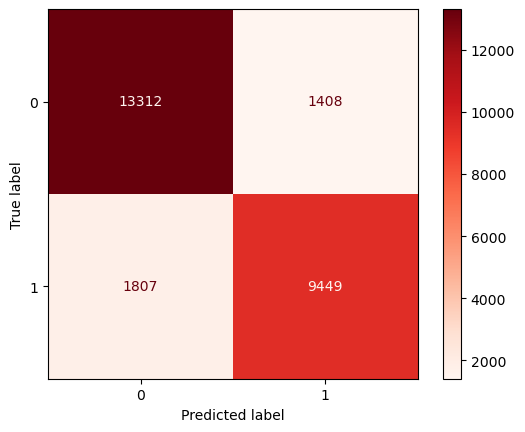

In [28]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds')

In [30]:
# Model 3 – Random Forest
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [34]:
rf.score(X_train_sc, y_train)

1.0

In [36]:
rf.score(X_test_sc, y_test)

0.9598860486603018

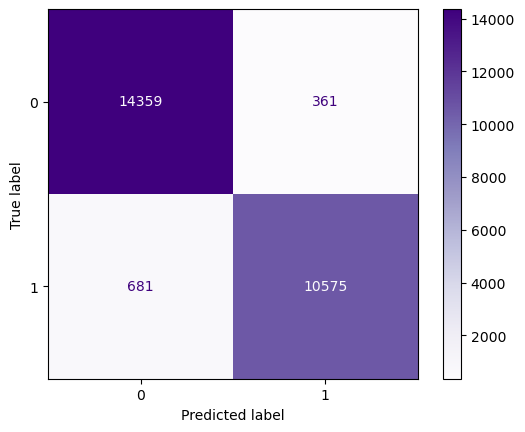

In [38]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');

## Interpretations of Results

- **Model 1 KNN (test: 0.92, train:0.94):** This model performs well but is struggling with large data or unseen patterns. But shows a good generalization.
- **Model 2 Logistic Regression (test: 0.8762, train: 0.8745):** This model is stable and interpretable, but is less accurate when compared with higher false positives and negatives.
- **Model 3 Random Forest (test: 0.95, train: 1.0):** This model showed the best performance but there is a small risk of overfitting. It can predict both classes with high precision.

### Therefore, the best model to proceed with is **Random Forest**
- It has the highest test accuracy (95%), showing strong predictive power.

- It correctly identifies both satisfied and dissatisfied passengers.

- Although train accuracy is perfect (1.0), which suggests overfitting, but its strong test performance makes it suitable.

In [42]:
# saving our Random forest model into a file for later use
import joblib
joblib.dump(rf, 'rf_airline_model.pkl')

['rf_airline_model.pkl']

In [44]:
feature_list = X.columns.tolist()
joblib.dump(feature_list, "rf_model_features.pkl")

['rf_model_features.pkl']